In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
df = pd.read_csv(r'C:\Users\HARSHIT JAIN\Desktop\data science projects\Real_Estate_Data_science_Project\DATASETS\gurgaon_properties_cleaned_v1\gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,4,3,servant room,12.0,North-East,1 to 5 Year Old,"['Sector 53-54 Metro Station', 'Sector 54 Chowk', 'Suncity Shopping Complex', 'IILM University, Gurugram', 'EuroKids Preschool Suncity', 'Sushant University', 'Suncity School Gurgaon', 'Vallores Pre School', 'YES Bank ATM', 'Paras Hospitals, Gurgaon', 'W Pratiksha Hospital', 'Umkal Hospital', 'Health Care Pharmacy', 'Apollo Pharmacy', 'Haryana City Gas']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,study room,2.0,NaN,0 to 1 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Water softening plant']"
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,9.0,West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached P

# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

In [5]:
df[['area','areaWithType']].sample(5)

,area,areaWithType
3714,1790.0,Super Built up area 1790(166.3 sq.m.)
723,1579.0,Super Built up area 1578(146.6 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.)
3645,3000.0,Super Built up area 3000(278.71 sq.m.)
3723,1423.0,Built Up area: 1423 (132.2 sq.m.)
3632,2700.0,Plot area 300(250.84 sq.m.)


## areaWithType

In [6]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)



In [10]:
# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

In [11]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [12]:

df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
821,0.75,falt,1290.0,Carpet area: 1290 (119.84 sq.m.),NaN,NaN,1290.00
1940,3.35,falt,2034.0,Super Built up area 2034(188.96 sq.m.),2034.0,NaN,NaN
1875,0.90,falt,1295.0,Built Up area: 1295 (120.31 sq.m.),NaN,1295.0,NaN
2730,0.60,falt,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),650.0,NaN,596.12
2155,0.65,house,1000.0,Carpet area: 1000 (92.9 sq.m.),NaN,NaN,1000.00


In [13]:
df.duplicated().sum()

120

In [14]:

df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [15]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [16]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,2.80,house,2250.0,Plot area 2250(209.03 sq.m.),NaN,NaN,NaN
9,0.55,house,820.0,Plot area 820(76.18 sq.m.)Built Up area: 810 sq.ft. (75.25 sq.m.)Carpet area: 715 sq.ft. (66.43 sq.m.),NaN,810.0,715.0
15,12.50,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
21,1.35,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,NaN,NaN
34,1.16,house,992.0,Plot area 992(92.16 sq.m.)Carpet area: 992 sq.ft. (92.16 sq.m.),NaN,NaN,992.0


In [17]:
df.shape

(3802, 20)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqrt           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2615
carpet_area            1858
dtype: int64

In [19]:
 all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [20]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,2.80,house,2250.0,Plot area 2250(209.03 sq.m.),NaN,NaN,NaN
15,12.50,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
21,1.35,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,NaN,NaN
38,0.90,house,800.0,Plot area 800(74.32 sq.m.),NaN,NaN,NaN
39,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [21]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [22]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [23]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)
# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,2.80,house,2250.0,Plot area 2250(209.03 sq.m.),NaN,2250.00,NaN
15,12.50,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN
21,1.35,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.00,NaN
38,0.90,house,800.0,Plot area 800(74.32 sq.m.),NaN,800.00,NaN
39,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
48,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
59,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
67,6.25,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
70,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,107.00,NaN
72,0.60,house,972.0,Plot area 108(90.3 sq.m.),NaN,108.00,NaN


In [25]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [26]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [27]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,2.80,house,2250.0,Plot area 2250(209.03 sq.m.),NaN,2250.00,NaN
15,12.50,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN
21,1.35,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.00,NaN
38,0.90,house,800.0,Plot area 800(74.32 sq.m.),NaN,800.00,NaN
39,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
48,5.50,house,2546.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
59,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
67,6.25,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
70,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,963.00,NaN
72,0.60,house,972.0,Plot area 108(90.3 sq.m.),NaN,972.00,NaN


In [28]:
df.update(all_nan_df)

In [29]:
df.head(5)

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,4,3,servant room,12.0,North-East,1 to 5 Year Old,"['Sector 53-54 Metro Station', 'Sector 54 Chowk', 'Suncity Shopping Complex', 'IILM University, Gurugram', 'EuroKids Preschool Suncity', 'Sushant University', 'Suncity School Gurgaon', 'Vallores Pre School', 'YES Bank ATM', 'Paras Hospitals, Gurgaon', 'W Pratiksha Hospital', 'Umkal Hospital', 'Health Care Pharmacy', 'Apollo Pharmacy', 'Haryana City Gas']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2329.0,1900.0,1700.0
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,study room,2.0,NaN,0 to 1 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Water softening plant']",NaN,NaN,4500.0
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,9.0,West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)',

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqrt           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2069
carpet_area            1858
dtype: int64

##  additionalRoom 

In [31]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            98
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [32]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

In [33]:
# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [34]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3168,others,0,0,0,0,1
379,"servant room,store room",0,1,1,0,0
3771,not available,0,0,0,0,0
1742,servant room,0,1,0,0,0
3693,study room,1,0,0,0,0


In [35]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,4,3,servant room,12.0,North-East,1 to 5 Year Old,"['Sector 53-54 Metro Station', 'Sector 54 Chowk', 'Suncity Shopping Complex', 'IILM University, Gurugram', 'EuroKids Preschool Suncity', 'Sushant University', 'Suncity School Gurgaon', 'Vallores Pre School', 'YES Bank ATM', 'Paras Hospitals, Gurgaon', 'W Pratiksha Hospital', 'Umkal Hospital', 'Health Care Pharmacy', 'Apollo Pharmacy', 'Haryana City Gas']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2329.0,1900.0,1700.0,0,1,0,0,0
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,study room,2.0,NaN,0 to 1 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Water softening plant']",NaN,NaN,4500.0,1,0,0,0,0
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,9.0,West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaast

## 	agePossession

In [36]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Aug-23                   7
Jun-24                   7
Dec-25                   6
Nov-23                   5
Jul-24                   4
Aug-24                   4
Oct-23                   4
Sep-23                   4
By 2025                  4
Nov-24                   3
Jan-25                   3
May-24                   3
Feb-24                   3
Jul-25                   2
Jan-26                   2
Dec-26                   2
Aug-25                   2
Sep-25                   2
Apr-26                   2
By 2027                  2
Mar-25                   2
Jun-27                   2
O

In [37]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [38]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [39]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              483
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [40]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,4,3,servant room,12.0,North-East,Relatively New,"['Sector 53-54 Metro Station', 'Sector 54 Chowk', 'Suncity Shopping Complex', 'IILM University, Gurugram', 'EuroKids Preschool Suncity', 'Sushant University', 'Suncity School Gurgaon', 'Vallores Pre School', 'YES Bank ATM', 'Paras Hospitals, Gurgaon', 'W Pratiksha Hospital', 'Umkal Hospital', 'Health Care Pharmacy', 'Apollo Pharmacy', 'Haryana City Gas']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2329.0,1900.0,1700.0,0,1,0,0,0
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,study room,2.0,NaN,New Property,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Water softening plant']",NaN,NaN,4500.0,1,0,0,0,0
2,falt,tulip violet,sector 69,1.40,8856.0,1581.0,Super Built up area 1578(146.6 sq.m.),3,3,2,pooja room,9.0,West,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Com

## 	furnishDetails

In [41]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
944,"['5 Wardrobe', '1 Water Purifier', '4 Fan', '6 Geyser', '1 Microwave', '17 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
1594,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3584,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Shopping Centre']"
2016,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1711,NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [42]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [43]:
furnishings_df.shape

(3802, 19)

In [44]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_11344\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [45]:
furnishings_df.sample(5)

,Stove,AC,Microwave,Water Purifier,Sofa,TV,Modular Kitchen,Washing Machine,Exhaust Fan,Wardrobe,Geyser,Fridge,Bed,Light,Dining Table,Chimney,Curtains,Fan
2486,0,2,0,0,0,0,1,0,0,2,2,0,0,11,0,0,0,4
1664,0,0,0,0,0,0,0,0,1,12,0,0,0,101,0,1,0,12
3496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [48]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anacon

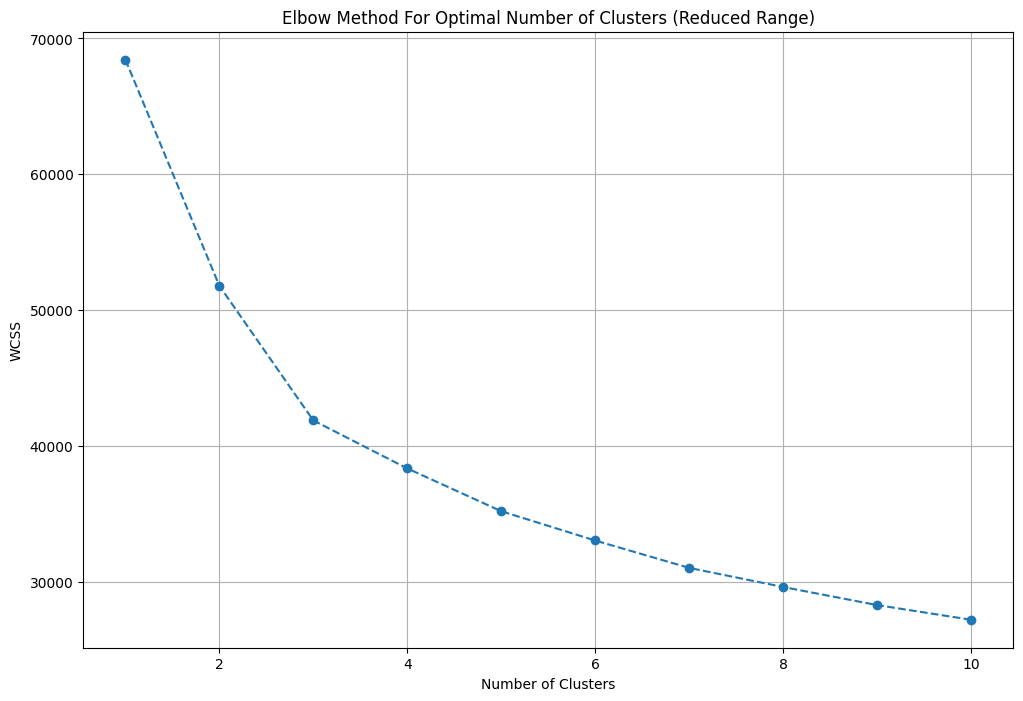

In [49]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
df = df.iloc[:,:-18]

In [52]:
df['furnishing_type'] = cluster_assignments

In [53]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1357,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3616,NaN,1
3091,"['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",0
3647,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
500,"['4 Wardrobe', '1 Water Purifier', '12 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '9 Light', '1 Chimney', '1 Modular Kitchen', '7 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",0


##  features

In [54]:
df[['society','features']].sample(5)

,society,features
1107,supertech hues,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre']"
2325,signature global park,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1747,emaar digihomes,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
1153,unitech espace,"['Maintenance Staff', 'Water Storage', 'Fitness Centre / GYM', 'Waste Disposal']"
1858,vatika city homes,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [55]:
df['features'].isnull().sum()

635

In [56]:
import pandas as pd
app_df = pd.read_csv(r'C:\Users\HARSHIT JAIN\Desktop\data science projects\Real_Estate_Data_science_Project\DATASETS\real_estate_data\real_estate_data - real_estate_data.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [57]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [58]:
temp_df = df[df['features'].isnull()]

In [59]:
temp_df.shape

(635, 26)

In [60]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [61]:
df.loc[temp_df.index,'features'] = x.values

In [62]:
df['features'].isnull().sum()

481

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [64]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [65]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
986,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0
2289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3282,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [66]:
features_binary_df.shape

(3802, 130)

In [67]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HARSHIT JAIN\anacon

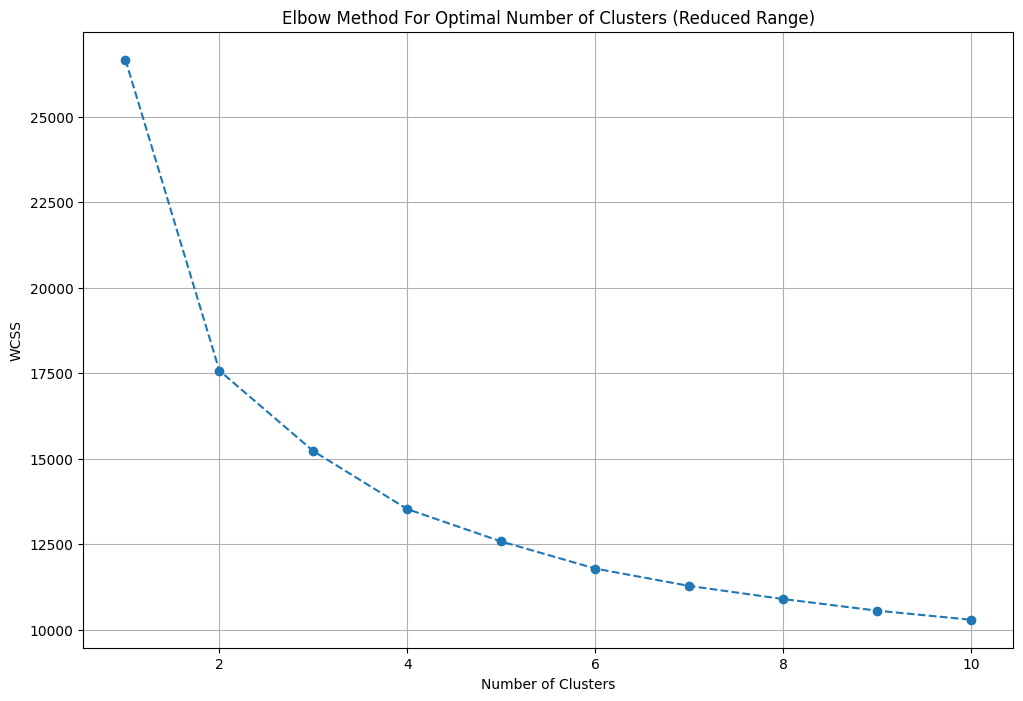

In [68]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [69]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [70]:
df['luxury_score'] = luxury_score

In [71]:
df.head()

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,falt,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),3,4,3,servant room,12.0,North-East,Relatively New,"['Sector 53-54 Metro Station', 'Sector 54 Chowk', 'Suncity Shopping Complex', 'IILM University, Gurugram', 'EuroKids Preschool Suncity', 'Sushant University', 'Suncity School Gurgaon', 'Vallores Pre School', 'YES Bank ATM', 'Paras Hospitals, Gurgaon', 'W Pratiksha Hospital', 'Umkal Hospital', 'Health Care Pharmacy', 'Apollo Pharmacy', 'Haryana City Gas']","['1 Water Purifier', '5 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2329.0,1900.0,1700.0,0,1,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
1,falt,palam vihar society,sector 2,3.35,7444.0,4500.0,Carpet area: 4500 (418.06 sq.m.),4,4,3+,study room,2.0,NaN,New Property,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Kalyan Hospital Gurgaon', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Chirag Hospital Pvt. Ltd', 'R K Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Big Cinemas', ""McDonald's"", 'Cafe Coffee Day', 'Moti Mahal', 'Pizza Hut', 'Pind Baluchi', ""Domino's Pizza"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'THE NORTHCAP UNIVERSITY', 'Swiss Cottage school', 'Palam vihar railway station']","['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Water softening plant']",NaN,NaN,4500.0,1,0,0,0,0,1,"[Lift(s), High Ceiling Height, Maintenance Staff, F

In [72]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [73]:
df.sample(5)

,property_type,society,sector,price,price_per_sqrt,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3324,falt,dlf carlton estate,sector 43,2.00,14214.0,1407.0,Super Built up area 1407(130.71 sq.m.),3,3,2,5.0,South-West,Moderately Old,1407.0,NaN,NaN,0,0,0,0,0,1,65
2521,falt,ansal heights 86,sector 86,1.05,5541.0,1895.0,Super Built up area 1895(176.05 sq.m.),3,3,3,9.0,North-East,Under Construction,1895.0,NaN,NaN,0,1,0,0,0,1,0
3453,falt,raheja sampada,sector 92,0.70,4453.0,1572.0,Built Up area: 1572 (146.04 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1572.0,NaN,0,0,0,0,0,1,0
2143,falt,orris aster court premier,sector 85,1.20,5660.0,2120.0,Super Built up area 2120(196.95 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,4,2,6.0,North-East,Relatively New,2120.0,1650.0,1550.0,0,1,0,0,0,1,28
2288,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,3600.0,NaN,1,1,1,1,0,0,153


In [74]:
df.shape

(3802, 23)

In [75]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)